# 실습과제: 데이터 전처리 및 교차표 시각화

***

In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

data = pd.read_csv('health2018.csv')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


## 판다스를 이용한 데이터 조작
### 1. 구간화(pd.cut)를 이용해 다음 체중 분류를 obesity 열로 추가하시오.
BMI 18.5 미만 : "저체중"

BMI 18.5 이상 25 미만 : "정상"

BMI 25 이상 30 미만: "비만"

BMI 30 이상: "고도비만"

obesity 열을 추가한 후 data.head(30)으로 처음 30개 데이터를 체크하시오.

In [2]:
# BMI 수치는 기본적으로 0 이상이며 데이터 중 BMI 최대치에서 + 1 한 값을 max로 두어 결측치가 없도록 하였다.
obesity_bins = [0,18.5, 25, 30, max(data.BMI) + 1]
# 구간별 이름 설정
obesity_group_names = ['저체중', '정상', '비만', '고도비만']
# 'right = False'로 하여 ~ 이상 ~ 미만으로 설정하였다.
data['obesity'] = pd.cut(data.BMI, obesity_bins, right = False, labels = obesity_group_names)
# data의 상위 30개 데이터 출력
data.head(30)


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만
5,A901023304,F,71,157.2,53.2,78.4,21.528142,51,정상
6,A901023501,M,44,180.0,85.6,96.1,26.419753,163,비만
7,A901023502,F,42,168.8,54.2,70.3,19.021922,83,정상
8,A901023901,M,36,172.6,69.0,84.2,23.161544,86,정상
9,A901023902,F,30,153.9,54.7,78.8,23.094581,104,정상


### 2. value_counts() 메소드를 활용하여 저체중, 정상, 비만, 고도비만이 각각 몇 명인지 계산하시오.

In [3]:
# obesity 칼럼들의 값별 카운트수를 구함
data.obesity.value_counts()

obesity
정상      3696
비만      1752
고도비만     318
저체중      202
Name: count, dtype: int64

### 3-1. 구간화(pd.cut)를 이용해 다음 연령 분류를 age_group 열로 추가하시오.
20세 이상 30세 미만: '20대'

30세 이상 40세 미만: '30대'

40세 이상 50세 미만: '40대'

50세 이상 60세 미만: '50대'

60세 이상 70세 미만: '60대'

70세 이상 80세 미만: '70대'

In [4]:
# 구간 분할 경계 설정
age_bin = [20, 30, 40, 50, 60, 70, 80]
# 구간별 이름 설정
age_group_names = ['20대', '30대', '40대', '50대', '60대', '70대']
# 'right = False'로 하여 ~ 이상 ~ 미만으로 설정하였다.
data['age_group'] = pd.cut(data.age, age_bin, right = False, labels=age_group_names)
# data의 상위 30개 데이터 출력
data.head(30)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,age_group
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,NaN
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,NaN
5,A901023304,F,71,157.2,53.2,78.4,21.528142,51,정상,70대
6,A901023501,M,44,180.0,85.6,96.1,26.419753,163,비만,40대
7,A901023502,F,42,168.8,54.2,70.3,19.021922,83,정상,40대
8,A901023901,M,36,172.6,69.0,84.2,23.161544,86,정상,30대
9,A901023902,F,30,153.9,54.7,78.8,23.094581,104,정상,30대


### 3-2. 매핑 기능을 활용해서 다음과 같이 age_group2 열을 생성하시오.
20대, 30대 : 청년 

40대, 50대 : 중년 

60대, 70대 : 노년 

In [5]:
# mapping할 값 설정
age_map = {

    '20대' : '청년',
    '30대' : '청년',
    '40대' : '중년',
    '50대' : '중년',
    '60대' : '노년',
    '70대' : '노년'
}
# map 설정
data['age_group2'] = data['age_group'].map(age_map)
# data의 상위 30개 데이터 출력
data.head(30)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,age_group,age_group2
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,NaN,NaN
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대,노년
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대,노년
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대,중년
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,NaN,NaN
5,A901023304,F,71,157.2,53.2,78.4,21.528142,51,정상,70대,노년
6,A901023501,M,44,180.0,85.6,96.1,26.419753,163,비만,40대,중년
7,A901023502,F,42,168.8,54.2,70.3,19.021922,83,정상,40대,중년
8,A901023901,M,36,172.6,69.0,84.2,23.161544,86,정상,30대,청년
9,A901023902,F,30,153.9,54.7,78.8,23.094581,104,정상,30대,청년


### 4-1. age_group 열에서 NaN을 포함한 행(레코드)의 갯수를 알아보시오.
* 힌트: isna() 함수와 sum() 함수 조합 활용. 혹은 value_counts()메소드에서는 dropna = False 옵션 활용.

In [7]:
# age_group 칼럼의 value count값 구하고 합계 출력 -> NaN 개수 : 308개 
print(f'null값 포함 data 행 개수 : {data.age_group.value_counts(dropna= False).sum()}')

null값 포함 data 행 개수 : 5968


### 4-2. NaN을 포함한 행을 데이터에서 삭제하시오.
몇 개의 행(샘플)이 남는가?

In [8]:
print(f'원래 수 : {len(data)}')
# dropna() 함수를 통해 결측값이 있는 행 삭제
data = data.dropna()
print(f'지금 수 : {len(data)}')

원래 수 : 5968
지금 수 : 5660


## 교차표 생성
### 5-1. 20대 그룹에서 성별로 저체중/정상/비만/고도비만 체중 분포를 교차표로 구하시오.

In [9]:
# 20대 그룹 설정
data_20 = data[data['age_group'] == '20대']
# crosstab 함수를 통해 교차표 구함
pd.crosstab(data_20.sex, data_20.obesity)

obesity,저체중,정상,비만,고도비만
sex,,,,
F,46,256,44,12
M,12,194,81,35


### 5-2. seaborn의 countplot을 이용하여 위의 결과를 그래프로 표현하시오. (혹은 다른 그래프로 그려도 무방함) [2점]
남성 vs. 여성 간에 체중분포는 어떻게 다른가? 정성적으로 설명하시오. (1점)

<Axes: xlabel='sex', ylabel='count'>

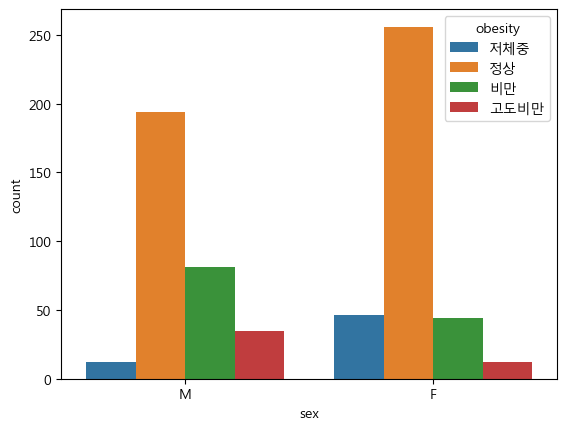

In [10]:
sns.countplot(data = data_20, x = 'sex', hue= 'obesity')
# 남성과 여성 간의 체중분포는 남성이 여성에 비해 '저체중'이 적고 '비만'과 '고도비만'이 많으며 여성은 남성에 비해 '저체중'이 많고 '비만'과 '고도비만'이 적다.

### 5-3. 20대 그룹에서 성별로 저체중/정상/비만/고도비만 체중 분포를 교차표로 구하되, 남성 여성 각각에서의 비율을 구하시오 (남성 내의 합이 1, 여성 내의 합이 1이 되도록).
* 힌트: pd.crosstab()에서 normalize 옵션 사용. normalize = 'index', 'column', True 옵션을 각각 테스트해보고 적정한 것을 사용할 것.
* ?pd.crosstab 이나 help(pd.crosstab) 으로 파이썬 내부 도움말 확인 가능.

In [11]:
pd.crosstab(data_20.sex, data_20.obesity, normalize='index')

obesity,저체중,정상,비만,고도비만
sex,,,,
F,0.128492,0.715084,0.122905,0.033520
M,0.037267,0.602484,0.251553,0.108696
